# Machine Learning Online Class - Exercise 2: Logistic Regression 

## ex2 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as op

In [2]:
#  Load Data
#  The first two columns contains the exam scores and the third column
#  contains the label.

data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'y'])
X = data.values[:, :2]
y = data.y.values.reshape(len(X),1)

print(f'Training samples :\n {X[:10, :]}\n')
print(f'Training labels :\n {y[:10, :]}\n')



Training samples :
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]
 [45.08327748 56.31637178]
 [61.10666454 96.51142588]
 [75.02474557 46.55401354]
 [76.0987867  87.42056972]
 [84.43281996 43.53339331]]

Training labels :
 [[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]]



### Plotting 

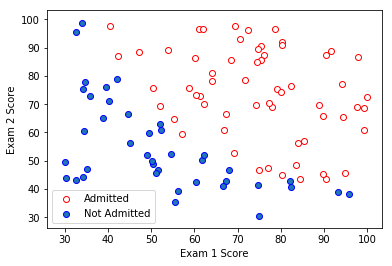

In [3]:
def plotData(X, y):
    pos = np.argwhere(y==1)[:,0] # positive examples
    neg = np.argwhere(y==0)[:,0] # negative examples
    
    plt.scatter(X[pos,0], X[pos,1],c='w', edgecolors='red', marker='o', label='Admitted')
    plt.scatter(X[neg,0], X[neg,1], edgecolors='blue', marker='o', label='Not Admitted')
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')
    plt.legend()
    
    plt.show()

plotData(X, y)

### Optimizing using TNC

In [4]:
def costFunction(theta, X, y):
    # compute costfunction and gradient for logistic regression
    m = len(X)
    
    J = 0
    grad = np.zeros(shape=theta.shape)
    
    h = 1/(1+np.exp(-(X.dot(theta))))
    
    J = (1/m) * (-y.T.dot(np.log(h)) - (1 -y).T.dot(np.log(1-h)))
    
    grad = (1/m) * (X.T.dot(h - y))
    
    return (J,grad)
    

In [5]:
initial_theta = np.zeros((len(X[0])+1,1))

X_aug = np.append(np.ones((len(X),1)), X, axis=1)
print(f'augmented X : \n{X_aug[:10, :]}\n')

(cost, grad) = costFunction(initial_theta, X_aug, y)

print(f'Cost at initial theta (zeros): \n{cost}');
print('Expected cost (approx): 0.693\n');
print('Gradient at initial theta (zeros): \n');
print(f'{grad}');
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n');

augmented X : 
[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]]

Cost at initial theta (zeros): 
[[0.69314718]]
Expected cost (approx): 0.693

Gradient at initial theta (zeros): 

[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628



In [11]:
initial_theta = np.zeros((len(X[0])+1))

def sigmoid(X, theta) : return 1/(1+np.exp(-(X.dot(theta.reshape(len(X[0]),1)))))
    
def cost(theta, X, y): 
    m = len(X)
    h = sigmoid(X, theta)
    return (1/m) * (-y.T.dot(np.log(h)) - (1 -y).T.dot(np.log(1-h)))
    
def grad(theta, X, y):
    m = len(X)
    h = sigmoid(X, theta)
    grad_ret = (1/m) * (X.T.dot(h - y))
    return grad_ret.flatten()


optimizer = op.minimize(fun=cost, x0=initial_theta, args=(X_aug, y), method='TNC', jac=grad)
J = optimizer.fun
theta = optimizer.x

print(f'Cost at theta found by TNC: {optimizer.fun}');
print('Expected cost (approx): 0.203\n');
print('theta: \n');
print(f'{optimizer.x} \n');
print('Expected theta (approx):\n');
print(' -25.161\n 0.206\n 0.201\n');

Cost at theta found by TNC: [[0.2034977]]
Expected cost (approx): 0.203

theta: 

[-25.16131869   0.20623159   0.20147149] 

Expected theta (approx):

 -25.161
 0.206
 0.201



float64


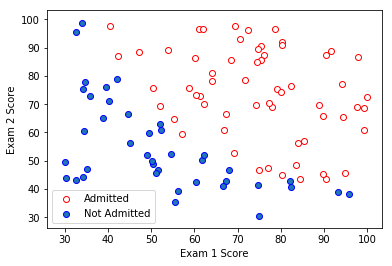

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [28]:
print(theta.dtype)
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

def plotDecisionBoundary(theta, X, y):
    plotData(X,y)
    plot_x = [np.min(X_aug[:,1]) - 2, np.max(X_aug[:,1]+2)]
    plot_y = ((-theta[0]/the[1]) * plot_x) - ()
    print(theta[2])
    print(plot_x)
    
    print(plot_y)
    
    plt.plot(plot_x, plot_y)

plotDecisionBoundary(theta, X, y)

In [33]:
prob = sigmoid(np.array([[1, 45, 85]]),theta)
print(f'For a student with scores 45 and 85, we predict an admission probability of {prob}\n')
print('Expected value: 0.775 +/- 0.002\n\n')

For a student with scores 45 and 85, we predict an admission probability of [[0.77629062]]

Expected value: 0.775 +/- 0.002




In [47]:
def predict(theta, X):
    threshold = 0.5
    
    sig = sigmoid(X, theta)
    p = np.array([1 if i >= 0.5 else 0 for i in sig ])
    return p
p = predict(theta, X_aug)

print(f'Train Accuracy: {np.mean(np.array([1 if i==j else 0 for i,j in zip(p,y)])) * 100}')
print('Expected accuracy (approx): 89.0\n')
print('\n')

Train Accuracy: 89.0
Expected accuracy (approx): 89.0



